# Imports

In [1]:
using Random
using Statistics
using Distributions
using ShiftedArrays
using CategoricalArrays
# using StatsPlots
using HypothesisTests

using DataFrames
using DataFramesMeta
using SpecialFunctions
using LinearAlgebra
using StatsFuns
using MixedModels
using CodecZlib
using JLD2
using Serialization
using LaTeXStrings

using CairoMakie  
# CairoMakie.activate!(inline=true)
CairoMakie.activate!(type = "png", inline=true, px_per_unit=2.0, pt_per_unit=1.0)

In [12]:
# using RLSR
using EM
include("../code/em_scripts.jl")
include("../code/sailing_base_lrl_blockwise_twoλ.jl");

In [ ]:
function unitnorm(x)
    0.5 .+ 0.5 .* erf.(x ./ sqrt(2))
end

function get_beta(r, varname)
    return r.betas[findfirst(r.varnames .== varname)]
end

function get_subject_beta(r, varname, subject)
    return r.x[subject, findfirst(r.varnames .== varname)]
end

function get_all_subjects_beta(r, varname)
    return r.x[:, findfirst(r.varnames .== varname)]
end

In [13]:
set_theme!()
update_theme!(
        fontsize = 7,
        fonts = (; regular= "Helvetica", bold="Helvetica"),
        figure_padding = (5.0, 5.0, 5.0, 5.0),
        Lines = (
            linewidth = 1.0,
        )
    )


In [14]:
file_prefix = "blockwise"
full_df = load("../derived/$(file_prefix).jld2")["full_df"]
ntrials = maximum(full_df.trial)
full_df[1:5, :]

Row,state1,state2,state3,endState,endBranchLeft,reward,action1Left,action2Left,rewardₜ₋₁,rewardₜ₋₂,state1ₜ₋₁,state1ₜ₋₂,state1ₜ₋₃,state2ₜ₋₁,state2ₜ₋₂,state3ₜ₋₁,state3ₜ₋₂,endStateₜ₋₁,endStateₜ₋₂,endBranchLeftₜ₋₁,endBranchLeftₜ₋₂,trial,subject,action1TowardsPrevEnd,action1Persistance,endBranchₜ₋₁SameAsLastChoice,priorMoveAt1,priorMoveAt2,priorMoveAt3,parentPriorMove,parentPriorMoveToEndState,parentPriorMoveToEndStateₜ₋₁,priorRewardAt2,priorRewardAt3,priorRewardAt4,priorRewardAt5,priorRewardAt6,priorRewardAt7,endStateSiblingPriorReward,endStateSiblingPriorRewardₜ₋₁,endStatePriorReward,endStatePriorRewardₜ₋₁,endStatePriorRewardₜ₋₂,priorRewardLeftBranch,priorRewardRightBranch,endStateBranchPriorReward,endStateBranchPriorRewardₜ₋₁,endStateBranchPriorRewardₜ₋₂,sub,assignment,r1,r2,r3,r4,rt_boat,rt_island,rewscaled,rwd_swap,rwd_swap_type,block_ind,block_num
,Int64,Int64,Int64,Int64,Bool,Float64,Bool?,Bool?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Bool?,Bool?,Int64,String,Bool?,Bool?,Bool?,Int64?,Int64?,Int64?,Int64?,Bool?,Bool?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,String,Float64,Float64,Float64,Float64,Real,Union…,Float64,Bool,String,Int64,Int64
1,1,3,6,6,false,0.0,false,true,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1,001,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,31.6,1743.3,-1.0,false,start,0,0
2,4,-1,-1,4,true,1.0,missing,missing,0.0,missing,1,missing,missing,3,missing,6,missing,6,missing,false,missing,2,001,missing,missing,missing,3,missing,6,missing,missing,missing,missing,missing,missing,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.0,missing,missing,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,3324.2,,1.0,false,start,1,0
3,1,2,4,4,true,1.0,true,true,1.0,0.0,4,1,missing,missing,3,missing,6,4,6,true,false,3,001,true,false,false,3,missing,6,missing,missing,missing,missing,missing,1.0,missing,0.0,missing,missing,missing,1.0,missing,missing,1.0,0.0,1.0,missing,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,1050.3,967,1.0,false,start,2,0
4,7,-1,-1,7,false,1.0,missing,missing,1.0,1.0,1,4,1,2,missing,4,missing,4,4,true,true,4,001,missing,missing,true,2,4,6,6,false,missing,missing,missing,1.0,missing,0.0,missing,0.0,missing,missing,1.0,missing,1.0,0.0,0.0,1.0,missing,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,2148.6,,1.0,false,start,3,0
5,1,2,4,4,true,1.0,true,true,1.0,1.0,7,1,4,missing,2,missing,4,7,4,false,true,5,001,false,true,false,2,4,6,4,true,false,missing,missing,1.0,missing,0.0,1.0,missing,0.0,1.0,missing,1.0,1.0,1.0,1.0,0.0,1.0,1,02nzj9jkf5f6zt1qpj88npr9,0.675,0.325,0.15,0.85,841.6,1189.4,1.0,false,start,4,0


# Blockwise Results

In [ ]:
s = "blockwise"
ver = "lrl_twoλ_twotd_TDlam1-1.0_BTD_1_BTD_2_BLRL1_BLRL2_BBoat_c-0.1_λ1_λ2_a1_aT1_islandbias_boatbias_homeaway_rewscaled_initx-100"
RERUN = false
if RERUN
    extended = true  # Estimate SEs etc. on parameters
    threads = true
    rewscaled = true
    groups = nothing
    initx = true  # Simulate multiple starting points
    nstarts = 100
    decorrelateαβ = false
    full = false
    noprior = false

    add_TDλ1 = false  # Fitting TD1
    add_TDλ2 = false
    add_BTD_1 = true
    add_BTD_2 = true
    add_BLRL1 = true
    add_BLRL2 = true
    add_a1 = true
    add_a2 = false
    add_aT1 = true
    add_aT2 = false
    add_initial_V = false
    add_c = false
    add_λ1 = true
    add_λ2 = true
    add_BBoat = true

    add_decay = false
    add_island_stay_bias = true
    add_boat_stay_bias = true
    separate_home_away = true

    TDλ1 = 1.0
    TDλ2 = nothing
    βTD_1 = nothing
    βTD_2 = nothing
    βLRL1 = nothing
    βLRL2 = nothing
    α1Home = nothing
    α1Away = nothing
    α2Home = nothing
    α2Away = nothing
    αT1 = nothing
    αT2 = nothing
    c = 0.1
    log_λ1 = nothing
    log_λ2 = nothing

    r = run_lrl_blockwise_twoλ_twotd(full_df; extended, full, noprior, threads, rewscaled, groups, initx, decorrelateαβ,
    add_TDλ1, add_TDλ2, add_βTD_1, add_βTD_2, add_βLRL1, add_βLRL2, add_α1, add_α2, add_αT1, add_αT2, add_initial_V, add_c, add_λ1, add_λ2, add_log_λs,
    add_βBoat, add_decay, add_island_stay_bias, add_boat_stay_bias, separate_home_away,
    TDλ1, TDλ2, βTD_1, βTD_2, βLRL1, βLRL2, α1Home, α1Away, α2Home, α2Away, αT1, αT2, c, log_λ1, log_λ2,
    nstarts)
    save("../results/$(s)/$(s)_$(ver).jld2", "results", r)
end

In [ ]:
s = "blockwise"
ver = "lrl_twoλ_twotd_TDlam1-1.0_BTD_1_BLRL1_BBoat_c-0.1_λ1_a1_aT1_islandbias_boatbias_homeaway_rewscaled_initx-100"
RERUN = false
if RERUN
    extended = true  # Estimate SEs etc. on parameters
    threads = true
    rewscaled = true
    groups = nothing
    initx = true  # Simulate multiple starting points
    nstarts = 100
    decorrelateαβ = false
    full = false
    noprior = false

    add_TDλ1 = false  # Fitting TD1
    add_TDλ2 = false
    add_BTD_1 = true
    add_BTD_2 = false
    add_BLRL1 = true
    add_BLRL2 = false
    add_a1 = true
    add_a2 = false
    add_aT1 = true
    add_aT2 = false
    add_initial_V = false
    add_c = false
    add_λ1 = true
    add_λ2 = false
    add_BBoat = true

    add_decay = false
    add_island_stay_bias = true
    add_boat_stay_bias = true
    separate_home_away = true

    TDλ1 = 1.0
    TDλ2 = nothing
    βTD_1 = nothing
    βTD_2 = nothing
    βLRL1 = nothing
    βLRL2 = nothing
    α1Home = nothing
    α1Away = nothing
    α2Home = nothing
    α2Away = nothing
    αT1 = nothing
    αT2 = nothing
    c = 0.1
    log_λ1 = nothing
    log_λ2 = nothing

    r = run_lrl_blockwise_twoλ_twotd(full_df; extended, full, noprior, threads, rewscaled, groups, initx, decorrelateαβ,
    add_TDλ1, add_TDλ2, add_βTD_1, add_βTD_2, add_βLRL1, add_βLRL2, add_α1, add_α2, add_αT1, add_αT2, add_initial_V, add_c, add_λ1, add_λ2, add_log_λs,
    add_βBoat, add_decay, add_island_stay_bias, add_boat_stay_bias, separate_home_away,
    TDλ1, TDλ2, βTD_1, βTD_2, βLRL1, βLRL2, α1Home, α1Away, α2Home, α2Away, αT1, αT2, c, log_λ1, log_λ2,
    nstarts)
    save("../results/$(s)/$(s)_$(ver).jld2", "results", r)
end

In [27]:
s = "blockwise"
ver = "lrl_twoλ_twotd_TDlam1-1.0_BTD_1_BTD_2_BLRL1_BLRL2_BBoat_c-0.1_λ1_λ2_a1_aT1_islandbias_boatbias_homeaway_rewscaled_initx-100"
r = load("../results/$(s)/$(s)_$(ver).jld2", "results")
HTML(show_results(r))

HTML{String}("<pre>[\"βTD_1\", \"βTD_2\", \"βLRL1\", \"βLRL2\", \"βBoat\", \"island_stay_bias\", \"boat_stay_bias\", \"α1Home\", \"α1Away\", \"αT1\", \"log_λ1\", \"log_λ2\"]<br/></pre>β:<br/><pre> βTD_1 βTD_2 βLRL1 βLRL2 βBoat islan boat_ α1Home α1Awa αT1    log_λ1 log_λ2 <br/> 0.37  0.23  1.9  1.49  2.12  0.43  0.3  <span style='color: red'>-0.54</span>  0.31  <span style='color: red'>-1.13</span>  <span style='color: red'>-0.45</span>  <span style='color: red'>-1.75</span><br/>p:<br/> 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.03  0.01</pre>σ²:<br/><pre>12×12 Diagonal{Float64, Vector{Float64}}:<br/> 0.35   ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅    0.11   ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅    1.96   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅    1.3   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅   1.57   ⋅     ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅    0.58   ⋅     ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅    0.28   ⋅     ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅    0.99   ⋅     ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅    0.51   ⋅    ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅    1.0   ⋅     ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   1.27   ⋅ <br/>  ⋅     ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    ⋅    1.01</pre>")

# Results Figures

## Non-Blockwise Fits

In [ ]:
x = "blockwise_lrl_twoλ_twotd_TDlam1-1.0_BTD_1_BLRL1_BBoat_c-0.1_λ1_a1_aT1_islandbias_boatbias_homeaway_rewscaled_initx-100"
r_lrl = load("../results/blockwise/$(x).jld2", "results")

r = r_lrl
b1 = r.betas[9]
x = [0, 0, 0, 0, 0, 0, 0, 0, 1]

se1 = sqrt(x' * r.covmtx * x)
print("SE: ")
println(round(se1; digits=3))
confints = se1 * 1.96

print("log(λ): ")
println(round(b1; digits=3), " +/- ", round(confints; digits=3))

nsub = size(r.x, 1)
nreg = size(r.x, 2)
nparam = size(r.betas,2)
pvals = 2*ccdf(TDist(nparam*(nsub - nreg - 1)), abs(b1) / se1)
println("t($(nparam*(nsub - nreg - 1))) = $(abs(b1) / se1)")
println("pval: ", round(pvals; digits=10))

f = Figure(size=72 .* (1.5, 2.0))
ax = Axis(f[1,1], xticks = (1:1, ["Subject λ Estimates"]),
    ylabel="Estimated log(λ)",
)
violin!(ones(100), r_lrl.x[:,9])
# scatter!(ones(100) .+ rand(100).*0.1 .- 0.05, r_lrl.x[:,9], color=:black)
boxplot!(ones(100), r_lrl.x[:,9], color=:black, width=0.2)
# save("figures/single_lambda_violin.pdf", f, pt_per_unit = 1.0)
f

## Blockwise Fits

Combined SEs
[0.195, 0.275]
log λ1: -0.453 +/- 0.382
log λ2: -1.754 +/- 0.539
Difference: 1.301 +/- 0.646
t(1044) = 3.9468576037132626
Diff pvals: 8.44835e-5


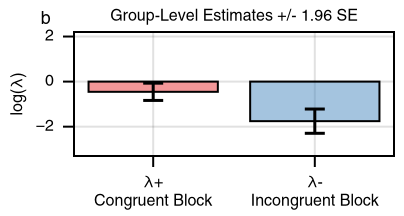

In [50]:
λ1_ind = findfirst(x -> x == "log_λ1", r.varnames)
λ2_ind = findfirst(x -> x == "log_λ2", r.varnames)

colors = categorical_colors(:Set1, 3)
betas = r.betas[[λ1_ind, λ2_ind]]
# Get Confidence Intervals
x = zeros(12)
x[λ1_ind] = 1
se1 = sqrt(x' * r.covmtx * x)
x = zeros(12)
x[λ2_ind] = 1
se2 = sqrt(x' * r.covmtx * x)
ses = [se1; se2]
println("Combined SEs")
println(round.(ses; digits=3))
confints = ses .* 1.96

print("log λ1: ")
println(round(betas[1]; digits=3), " +/- ", round(confints[1]; digits=3))
print("log λ2: ")
println(round(betas[2]; digits=3), " +/- ", round(confints[2]; digits=3))

diff1 = betas[1] - betas[2]
x = zeros(12)
x[λ1_ind] = 1
x[λ2_ind] = -1
diff1_se = sqrt(x' * r.covmtx * x)
println("Difference: ", round(diff1; digits=3), " +/- ", round(diff1_se * 1.96; digits=3))
nsub = size(r.x, 1)
nreg = size(r.x, 2)
nparam = size(r.betas,2)
pvals = 2*ccdf(TDist(nparam*(nsub - nreg - 1)), abs(diff1) / diff1_se)
println("t($(nparam*(nsub - nreg - 1))) = $(abs(diff1) / diff1_se)")
println("Diff pvals: ", round(pvals; digits=10))

f = Figure(size=72 .* (2.8, 1.5), fontsize=8)
ax = Axis(f[1, 1],xticks = (1:2, ["λ+\nCongruent Block", "λ-\nIncongruent Block"]),
                ylabel="log(λ)",
                title = "Group-Level Estimates +/- 1.96 SE",
                )
for i in 1:2
        g = barplot!(f[1,1], [i], [betas[i]],
                color=(colors[i], 0.45),
                strokecolor = :black, strokewidth = 1,
        )
end
errorbars!([1, 2], betas, confints, whiskerwidth = 10, color=:black)
ylims!(-3.3, 2.2)
Label(f[1, 1, TopLeft()], "b", fontsize = 9, font = :bold, padding = (0, 12, 2, 0), halign = :right)
# save("figures/blockwise_grouplevel.pdf", f, pt_per_unit=1.0)
f

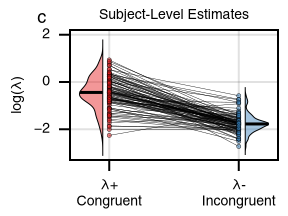

In [51]:
λ1_ind = findfirst(x -> x == "log_λ1", r.varnames)
λ2_ind = findfirst(x -> x == "log_λ2", r.varnames)

# colors = resample_cmap(:Accent_3, 3)[1:end]
colors = categorical_colors(:Set1, 3)

f = Figure(size=72 .* (2.0, 1.5))
ax = Axis(f[1,1], xticks = (1:2, ["λ+\nCongruent", "λ-\nIncongruent"]),
    ylabel="log(λ)",
    palette = (; patchcolor = colors),
    title = "Subject-Level Estimates",
)
x = repeat([1], inner=100) .- 0.05
violin!(x, r.x[:,λ1_ind],
        side = :left,
        strokecolor = :black, strokewidth = 0.5,
        color=(colors[1], 0.45),
        width=0.45,
        show_median=true,
        mediancolor=:black,
)
x = repeat([2], inner=100) .+ 0.05
violin!(x, r.x[:,λ2_ind],
        side = :right,
        strokecolor = :black, strokewidth = 0.5,
        color=(colors[2], 0.45),
        width=0.45,
        show_median=true,
        mediancolor=:black,
)
for i in 1:100
    lines!([1, 2], [r.x[i,λ1_ind], r.x[i,λ2_ind]], color=:black, linewidth=0.2)
    scatter!([1], [r.x[i,λ1_ind]], color=(colors[1], 0.5), strokewidth=0.2, markersize=3)
    scatter!([2], [r.x[i,λ2_ind]], color=(colors[2], 0.5), strokewidth=0.2, markersize=3)
end
ylims!(-3.3, 2.2)
Label(f[1, 1, TopLeft()], "c", fontsize = 9, font = :bold, padding = (0, 12, 2, 0), halign = :right)
# save("figures/blockwise_subjectlevel.pdf", f, pt_per_unit=1.0)
f

In [62]:
x = "blockwise_lrl_twoλ_twotd_TDlam1-1.0_BTD_1_BLRL1_BBoat_c-0.1_λ1_a1_aT1_islandbias_boatbias_homeaway_rewscaled_initx-100"
r_lrl = load("../results/blockwise/$(x).jld2", "results")
HTML(show_results(r_lrl))

HTML{String}("<pre>[\"βTD_1\", \"βLRL1\", \"βBoat\", \"island_stay_bias\", \"boat_stay_bias\", \"α1Home\", \"α1Away\", \"αT1\", \"log_λ1\"]<br/></pre>β:<br/><pre> βTD_1 βLRL1 βBoat islan boat_ α1Home α1Awa αT1    log_λ1 <br/> 0.45  1.74  2.12  0.43  0.3  <span style='color: red'>-0.52</span>  0.29  <span style='color: red'>-1.48</span>  <span style='color: red'>-0.8</span><br/>p:<br/> 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01</pre>σ²:<br/><pre>9×9 Diagonal{Float64, Vector{Float64}}:<br/> 0.49   ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ <br/>  ⋅    1.97   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ <br/>  ⋅     ⋅    1.6   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ <br/>  ⋅     ⋅     ⋅   0.57   ⋅     ⋅     ⋅     ⋅     ⋅ <br/>  ⋅     ⋅     ⋅    ⋅    0.28   ⋅     ⋅     ⋅     ⋅ <br/>  ⋅     ⋅     ⋅    ⋅     ⋅    0.94   ⋅     ⋅     ⋅ <br/>  ⋅     ⋅     ⋅    ⋅     ⋅     ⋅    0.48   ⋅     ⋅ <br/>  ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅    0.64   ⋅ <br/>  ⋅     ⋅     ⋅    ⋅     ⋅     ⋅     ⋅     ⋅    1.42</pre>")